# Machine Learning Basics with Keras

### 1. Basic Image Classification

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:

# Labels of the dataset that were not included
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### Explore the Data

- Shows that there are 60,000 images represented by a 28 x 28 pixel

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
np.unique(train_images[0])

array([  0,   1,   2,   3,   4,   6,   7,  10,  12,  13,  15,  18,  23,
        29,  35,  36,  40,  41,  44,  48,  52,  54,  55,  56,  57,  58,
        61,  62,  64,  65,  66,  67,  69,  72,  73,  74,  75,  77,  80,
        82,  88,  92,  98,  99, 102, 106, 107, 109, 115, 117, 119, 121,
       122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155,
       156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 248, 249, 250, 255], dtype=uint8)

#### Preprocess the data

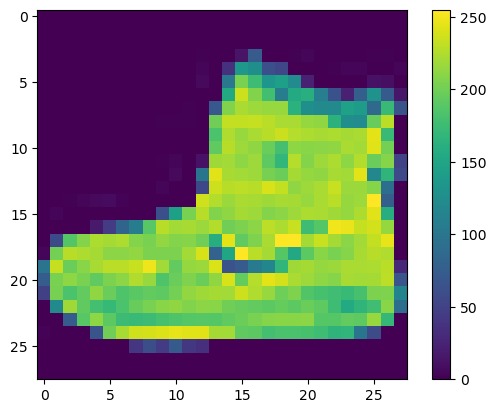

'\nplt.imshow: A matplotlib function for displaying images in Python. \n'

In [7]:
plt.figure() #initialize a new figure to display
plt.imshow(train_images[0]) #Displays the first image
plt.colorbar() # Adds a colorbar to the right of the image
plt.grid(False) #Get rid of gridlines
plt.show()

'''
plt.imshow: A matplotlib function for displaying images in Python. 
'''

Why normalize/scale values to a specific range like 0 : 1 or -1 : 1 ? 
1. Improves Convergence Speed: Neural Networks often perform better and converges faster when inputs are in a smaller range, such as 0 to 1. Scaling helps reduce the magnitude of gradients, which leads to more stable and efficient training. 
2. Avoids Saturation in Activation Functions: Many activation functions like sigmoid and tanh, are sensitive to input scale. Large input values can cause a sigmoid activation to saturate, which means it will output values close to 0 or 1, leading to vanishing gradients. This can slow or stall learning.

3. Prevents Instability: Larger values can make training more prone to instability, especially in deep networks, but causing exploding gradients or overly large weight updates. 


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

non_normalized_train_images = train_images * 255.0
non_normalized_test_images = test_images * 255.0

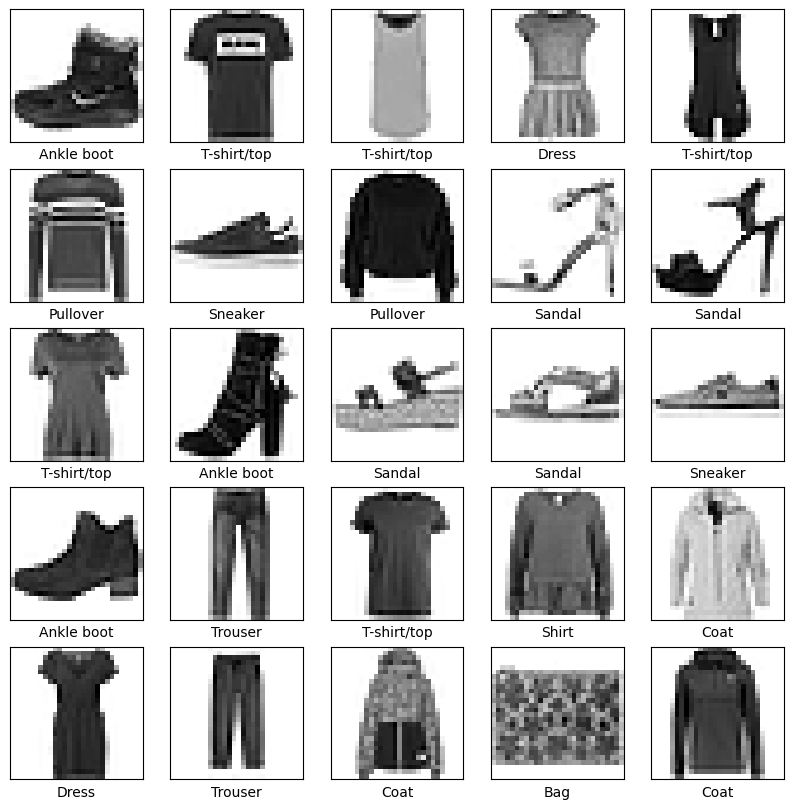

In [9]:
plt.figure(figsize=(10, 10))
for i in range (25) : 
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

#### Set up the layers



In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # The first layer transforms the the format of the images from a 2 dimentional array to one dimentional
    tf.keras.layers.Dense(128, activation = 'relu'), #
    tf.keras.layers.Dense(10)
])
'''The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.'''

/Users/stevenyu/anaconda3/envs/machinelearning/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.'

#### Compile the model

During the compile step, there are some settings that is made.

- Optimizer :  How the model is updated based on the data it sees and its loss function
- Loss function :  This measures how accurate the model is during training. This is the function that you want to minimize.
- Metrics : Used to monitor the training and testing steps.

In [12]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

#### Train the model
Steps:
1. Feed training data to the model
2. Model learns the associate images and label
3. Ask the model to make predictions about the test set
4. Verify the predictions

In [13]:
model.fit(train_images, train_labels, epochs=10) # empochs refers to one complete pass through the entire training dataset

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7759 - loss: 0.6373
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8611 - loss: 0.3873
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - loss: 0.3417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.8870 - loss: 0.3071
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8917 - loss: 0.2942
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8976 - loss: 0.2779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9023 - loss: 0.2642
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9029 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9064 - loss: 0.2504
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9140 - loss: 0.2327


##### Epoch:

- Epoch: One complete pass through the entire training dataset. 
- During an empoch, the model processes each example in the dataset exactly once, allowing it to learn from every sample. 
- Sometimes a typical dataset may be too large to process all at once. So the dataset is divided into smaller chunks called batches. In each epoch the model goes through all patches. 

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_loss, test_acc

313/313 - 0s - 567us/step - accuracy: 0.8833 - loss: 0.3339


(0.33389848470687866, 0.8833000063896179)

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) # Adds softmax function to convert output to probability
predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

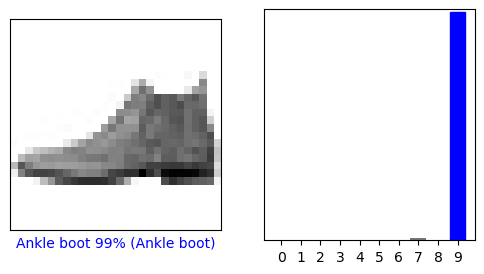

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

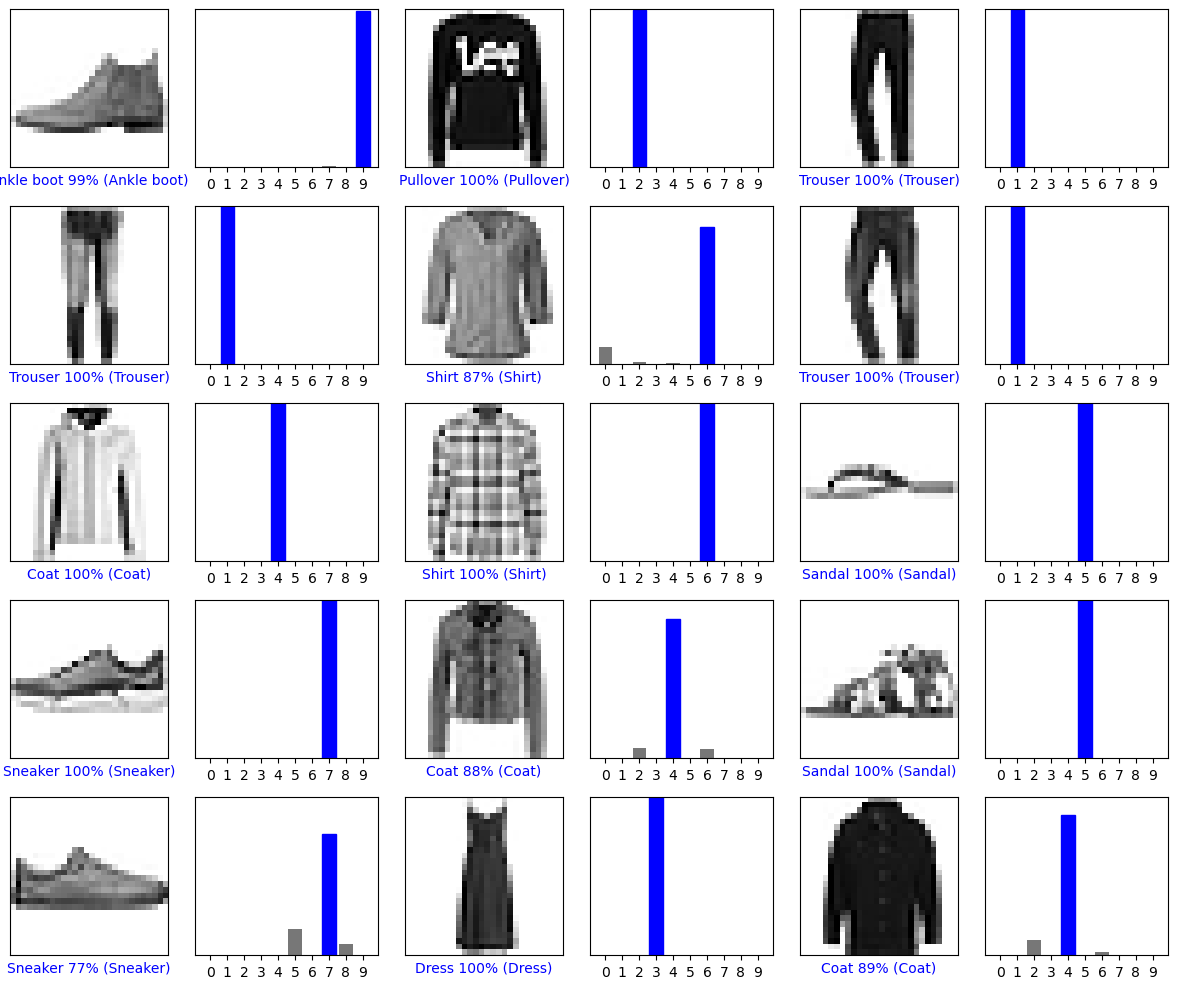

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()